***

# ML Mini Lessons and Model Overview

Below is a combination of various Jupyter notebooks I created containing information on different supervised and un-supervised machine learning models. These notebooks were created to serve as learning material for my peers.



***

# KNN 

***



#### What is it? 
> K-nearest neighbors (KNN) is supervised machine learning algorithm that can be used to solve both regression and classification tasks. 
    



#### How does it work?

> Lets say we have a dataset with three groups or classes of points - label 1, label 2, and label 3. After introducing a new point to the dataset, we want to determine which class the point could belong to. To determine the class of the new data point, KNN will calculate the distance between the new point and all other existing points in the dataset. K points closest to the new data point are then chosen, and the most common label/class among those k chosen points will be the class of the new data point. This process is repeated to classify data points.

> KNN can be simplified into three steps:
    
        1. Calculate distance
        2. Find k closest neighbors
        3. Majority vote for labels

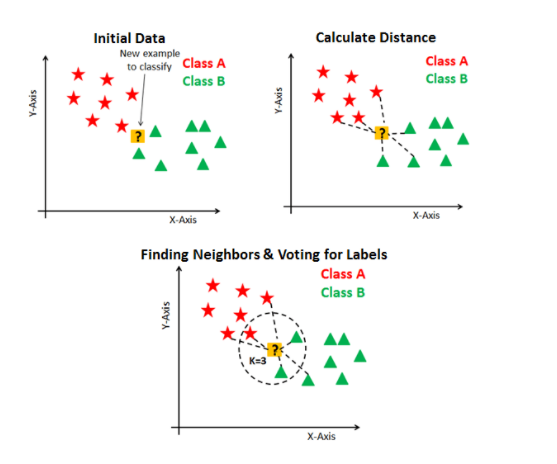

> There are a few different ways distance can be calculated. These are:
    
        - The Manhattan distance
    
    
 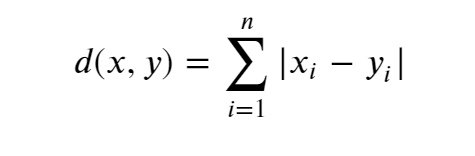
    
    
    

        - Euclidean Distance
    
    
   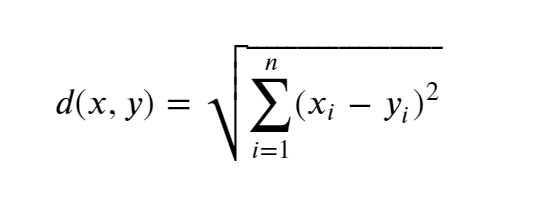

        - Minkowski distance 
    
            Both the Euclidean and Manhattan distances are special cases of the Minkowski distance, where c = 2 gives you the Euclidean distance and c= 1 gives you the Manhattan distance.
    
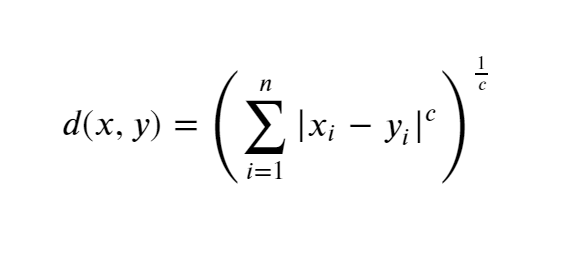




#### Pros and Cons

>Pros

        - No assumptions to be met
        - KNN is simple and intuitive
        - Can be used for both regression and classification
>Cons

        - Algorithm speed declines very fast as dataset grows
        - Curse of dimensionality: Struggles to predict as the number of variables increase
        - Imbalanced data can cause issues with classifying data points
        - Sensitive to outliers
        


### Model Implementation

> Below is an implementation of the KNN model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    
[Plotly](https://plotly.com/python/)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Scikit Learn Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Collections Counter()](https://docs.python.org/3/library/collections.html)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

In [1]:
#import libraries

import plotly.express as px

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from collections import Counter

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins data
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Bill depth, body mass, and flipper length are selected as features, while the response is species (Adelie or Gentoo).

In [4]:
#features
X = df[["bill_depth_mm", "body_mass_g", "flipper_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()

#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a 3D scatter plot. Below, penguin features are plotted and colored by species type. We can see that there is a clear separation of the data points within each class/species.

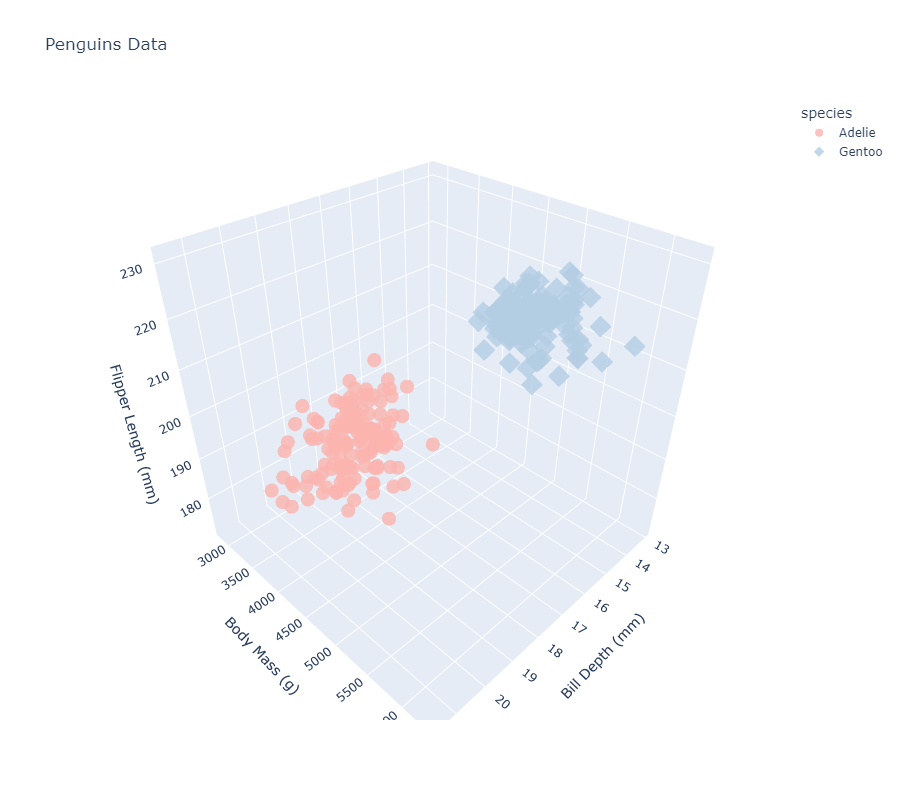

In [5]:
#Interactive 3d scatter plot

fig = px.scatter_3d(df, x ="bill_depth_mm", 
                    y ="body_mass_g", 
                    z ="flipper_length_mm",
                    color = 'species',
                    symbol = "species",
                    labels={
                     "bill_depth_mm": "Bill Depth (mm)",
                     "body_mass_g": "Body Mass (g)",
                     "flipper_length_mm": "Flipper Length (mm)"},
                    title = "Penguins Data",
                    color_discrete_sequence=px.colors.qualitative.Pastel1,
                    opacity = .8)


#run this to interact with 3d plot
#fig.show() 


fig.show("png", width=900, height=800) #this was necessary to show plot output in github

> Next, the data is then divided into train and test sets. The KNN model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 75% of the data will be used to train the model, while 25% of the data will be used to test the model.

In [6]:
#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=1234)

#### Model Building Steps

> With data preparation now complete, model building can now begin. Here are the steps:
    
    1. Calculate the distance between points in X_test and each row in X_train
    2. Sort the distances in ascending order
    3. Keep the distances of the k smallest points and retrieve the label
    4. Find the most common label and assign that label to the data point

#### Model Building

> Below the model is built using a class. The steps outlined above are clearly commented in the code below. 

In [7]:
#functions for both manhattan and euclidean distance
#will be able to select which distance to use when implementing 
#model with data set

def euclideanDistance(p, q):
    return np.sqrt(np.sum((p-q)**2))

def manhattanDistance(p, q):
    return np.sum(abs((p-q)))

In [8]:
class KNN:
    
    #sets k to a default value, euclidean distance used by default
    def __init__(self, k = 7, manhattan = False): 
        self.k = k
        self.Man = manhattan
        
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def labelPrediction(self, X_test): #pass in X
        label_Prediction = [self.predict(i) for i in X_test]
        return np.array(label_Prediction)
    

    def predict(self, X_test):
        
        #Step1:
        # Compute distances between x and all examples in the training set
        if self.Man == True:
            distances = [manhattanDistance(X_test, x_train) for x_train in self.X_train]
        else:
            distances = [euclideanDistance(X_test, x_train) for x_train in self.X_train]
            
        #Step 2
        # Sort by distance then return indices of the first *k* neighbors
        k_indices = np.argsort(distances)[: self.k]
        
        #Step 3
        # Extract the labels from y_train usings indices found previously
        labels = [self.y_train[i] for i in k_indices]
        
        #Step 4
        # Using counter and, most_common, return the most common class label/majority vote.
        mostCommon = Counter(labels).most_common(1)
        
        return mostCommon[0][0]

#### Using Model on Prepared Data

> Below, the model is trained by passing X_train and y_train to model.fit() with K set as 7. Afterwards, predictions are made by passing X_test to model.labelPrediction().

In [9]:
k = 7 #class default

model = KNN(k = k, manhattan = True)

model.fit(X_train, y_train)

predictions = model.labelPrediction(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tell us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> With K set to 7, the model has a decent accuracy score at 0.91. Therefore, the model is 91% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.95 and 0.86 respectively.

In [10]:
#classification report
print(classification_report(y_test, predictions))

#accuracy
np.sum(y_test == predictions) / len(y_test)

# print(Counter(y_test))
# Counter(predictions)

              precision    recall  f1-score   support

      Adelie       0.95      0.90      0.92        41
      Gentoo       0.86      0.92      0.89        26

    accuracy                           0.91        67
   macro avg       0.90      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67



0.9104477611940298

> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 39 observations labeled Adelie and 28 labeled Gentoo
        - There are 37 observations correctly classifed as Adelie (True Positive)
        - There are 4 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 24 observations correctly classified as Gentoo (True Negative)
        - There are 2 observations incorrectly classified as Adelie, when it should be Gentoo (False Positive)

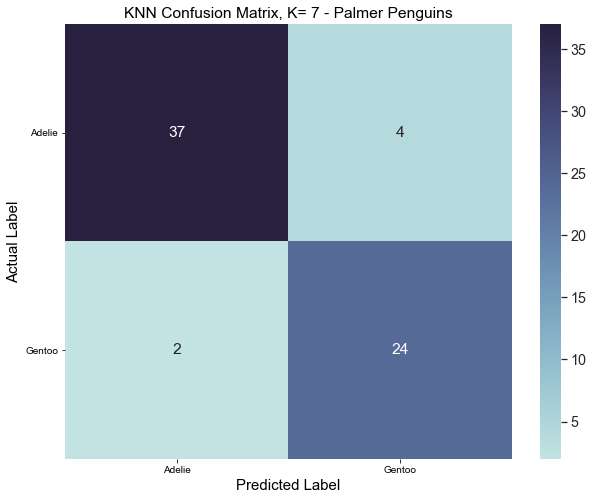

In [11]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("KNN Confusion Matrix, K= 7 - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Choosing Optimal K

> Below is a graph that plots accuracy against values of k. Based on the graph, it seems that choosing a k at around 5 (where the graph is slightly stable) will produce a model with a higher accuracy than 91%. 

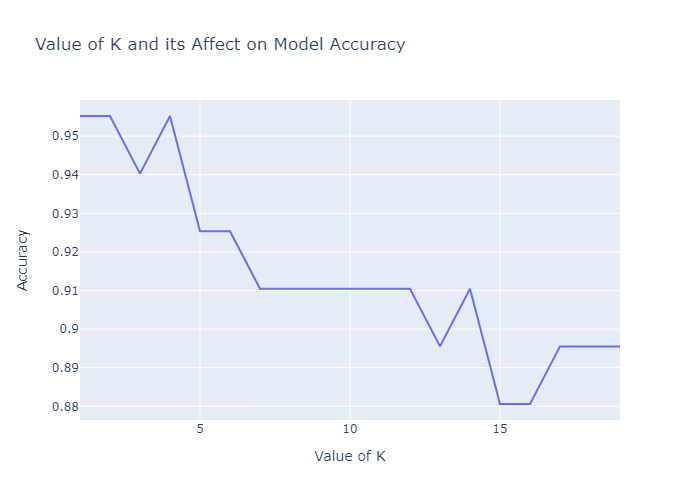

In [12]:
# try K=1 through K=30 and record testing accuracy
k_range = range(1, 20)
scores = []

for k in k_range:
    f = KNN(k = k)
    f.fit(X_train, y_train)
    predictions = f.labelPrediction(X_test)
    scores.append(np.sum(y_test == predictions) / len(y_test))

#create dataframe with ks and accuracy scores
scores_data = {"Value of K" : k_range, "Accuracy" : scores}
new_df = pd.DataFrame(scores_data)
new_df
    
#plot
fig = px.line(new_df , x = "Value of K" , y = "Accuracy" , 
              title='Value of K and its Affect on Model Accuracy')


#fig.show() #run this to get interactive plot

fig.show("png") #run this to get .png of plot. necessary for github

> We can also find the best k value by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), a function from ScikitLearn that allows us to easily check multiple values for k. Below, a GridSearchCV object is created.  GridSearchCV suggests that 7 is the optimal value of k.

In [13]:
#cross validation to find optimal k
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                      param_grid = {'n_neighbors': np.arange(1,20)})

knn_grid.fit(X_train, y_train)

knn_grid.best_params_

{'n_neighbors': 7}

### Applying Optimal K to Model

> Based on the graph above, it was decided that setting k to 5 will increase model accuracy. Below, the model is trained again by passing X_train and y_train to model.fit() with K set as 5 this time. Afterwards, predictions are made by passing X_test to model.labelPrediction().

In [14]:
k = 5

#create model with new value of k
model = KNN(k = k, manhattan = True)

#train model
model.fit(X_train, y_train)

#newy predictions
predictions = model.labelPrediction(X_test)


#### Model evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting this time with K set as 5. 

> With K set to 5, the model has a decent accuracy score at around 0.925. Therefore, this time the model is about 93% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.97 and 0.86 respectively.

In [15]:
print(classification_report(y_test, predictions))

#accuracy
np.sum(y_test == predictions) / len(y_test)

# print(Counter(y_test))
# Counter(predictions)

              precision    recall  f1-score   support

      Adelie       0.97      0.90      0.94        41
      Gentoo       0.86      0.96      0.91        26

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



0.9253731343283582

> Below, is another confusion matrix. The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 39 observations labeled Adelie and 28 labeled Gentoo
        - There are 37 observations correctly classifed as Adelie (True Positive)
        - There are 4 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 25 observations correctly classified as Gentoo (True Negative)
        - There is 1 observation incorrectly classified as Adelie, when it should be Gentoo (False Positive)

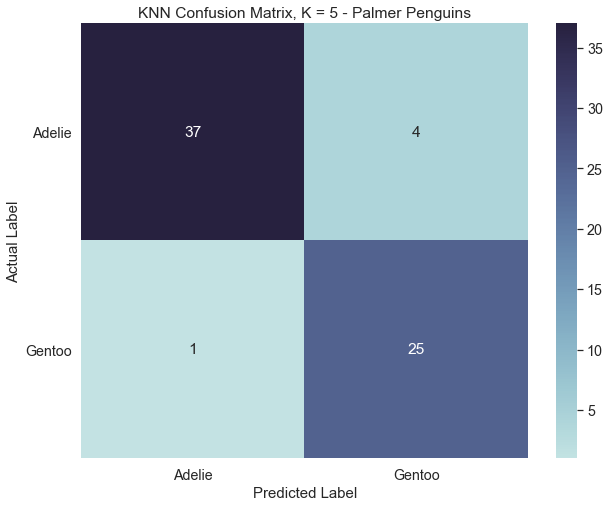

In [16]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("KNN Confusion Matrix, K = 5 - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

> Based on the confusion matrix and classification report above, we can see that setting K to a more optimal value produced a better classifier. Overall, the classifier with K set as 5 had higher values for precision, accuracy, f1-score and recall than the classifier with K set as 7.

***
### Model Implementation Using Scikit

> KNN can also be implemented using Scikit Learn. Below, I show how this can be done.

***

#### Libraries Used

> KNeighborsClassifier from Scikit Learn

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [17]:
#import kneighborsClassifier

from sklearn.neighbors import KNeighborsClassifier


#### Model Build
> Below, the model is built using the KNeighborsClassifier(). K is set to 5, and p is set to 1 for the Manhattan distance. The model is then trained by passing X_train and y_train to classifier.fit(). Afterwards, predictions are made by passing X_test to classifier.predict().

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 5, p=1)

#fitting the model
classifier.fit(X_train, y_train)

#predicts labels
pred = classifier.predict(X_test)

#### Model Evaluation

> As seen below, this classifier built with Scikit Learn produces the same results as the classifier that was built from scratch. The model classification report and confusion matrix are seen below.

In [19]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

      Adelie       0.97      0.90      0.94        41
      Gentoo       0.86      0.96      0.91        26

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



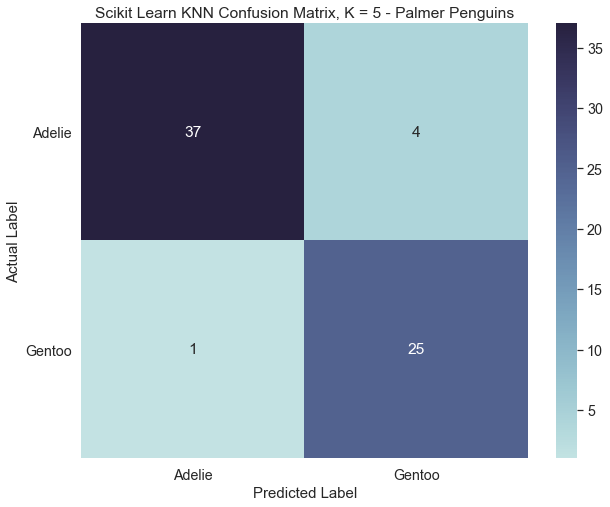

In [20]:
#confusion matrix
cm = confusion_matrix(y_test, pred)

matrix_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Scikit Learn KNN Confusion Matrix, K = 5 - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Conclusion

> Overall, the KNN model was fairly decent at classifying data points from the Palmer Penguins test dataset with an accuracy of 93%.

***

# Decision Tree

***



#### What is it? 
> Decision tree is a supervised machine learning algorithm that can be used to solve classification tasks. A decision tree is essentially a binary tree flow chart where each node splits a group of observations according to features. The goal is to split observations into groups until each observation in the same group belongs to the same class. 
    


#### How does it work?

> Decision tree can be simplified into three steps:
    
        1. Select the best attribute by using Attribute Selection Measures to split the observations
        2. Make the attribute a decision node and then break the dataset into smaller subsets
        3. Repeat the process for each child in the tree until:
            - There are no more remaining attributes
            - There are no more observations

> Examples of decision tree maps are seen below:

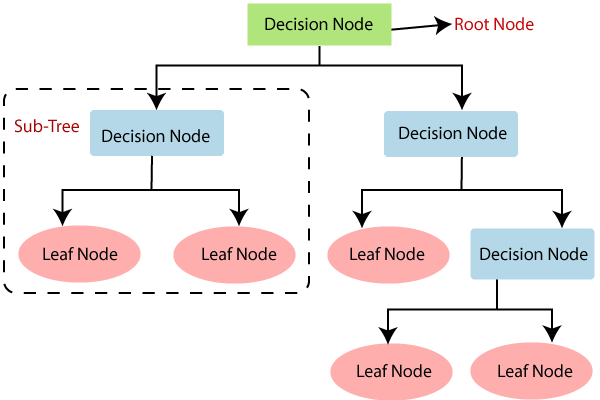

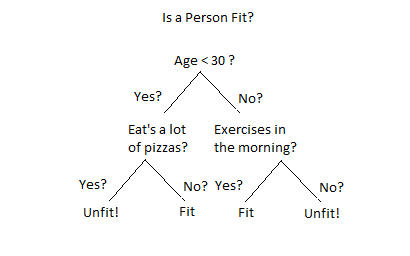

#### Pros and Cons

>Pros

        - Easy to visualize and interpret
        - Easily captures non-linear properties
        - No assumptions need to be met

>Cons

        - Sensitive to noisy data
        - Small variation in data can result in different decision trees
        


### Model Implementation

> Below is an implementation of the decision tree model on a dataset. 


#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    
[Plotly](https://plotly.com/python/)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Collections Counter()](https://docs.python.org/3/library/collections.html)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [1]:
#import libraries

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from collections import Counter

from sklearn.model_selection import GridSearchCV

import matplotlib.patches as mpatches


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and flipper length are selected as features, while the response is species (Adelie or Gentoo, 0 or 1).

In [4]:
#features
X = df[["body_mass_g", "flipper_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()

features = ["body_mass_g","flipper_length_mm" ]

labels = ["Adelie", "Gentoo"]

#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a scatter plot. Below, penguin features are plotted and colored by species type (Adelie purple and Gentoo blue). We can see that there is a clear separation of the data points within each class/species.

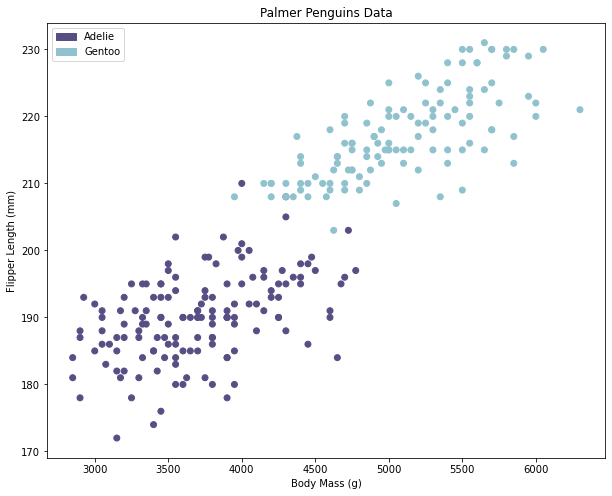

In [5]:
#scatter plot of data features
colors = ["#574E84" if label == "Adelie" else "#90C2CE" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.title("Palmer Penguins Data")

purple_patch = mpatches.Patch(color='#574E84', label='Adelie')

blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')

plt.legend(handles=[purple_patch, blue_patch])

plt.show()

> Next, the data is then divided into train and test sets. The decision tree model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 70% of the data will be used to train the model, while 30% of the data will be used to test the model.

In [6]:
#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1234)

#### Model Building

>  With data preparation now complete, model building can now begin. Below the model is built using the DecisionTreeClassifier() from sklearn. Here are the steps:

        1. Create and train an instance of the DecisionTreeClassifer class
        2. Use the trained model to classify observations in test data set


> For more information on scikit learn DecisionTreeClassifier(), you can scroll up to the "Libraries Used" header and select the hyper link "DecisionTreeClassifier" or click [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [7]:
#step 1
#Create and train an instance of the DecisionTreeClassifer class
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

> Next, we can take a look at the decision tree produced by the model now that the model has been trained. Below is the decision tree produced.

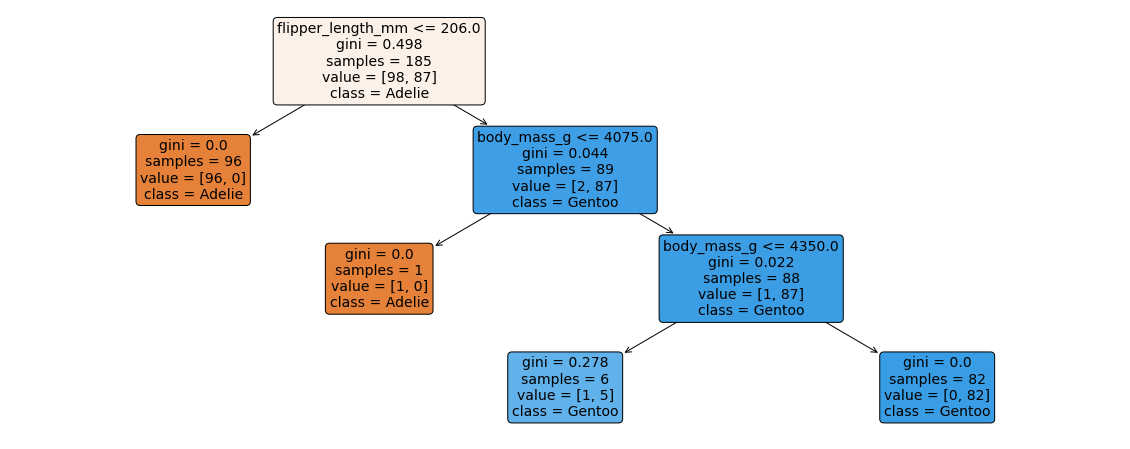

In [8]:
plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

#### Using Model on Prepared Data

> Below, predictions are made by passing X_test to decision_tree.predict().

In [9]:
#step 2
#Use the trained model to classify observations in test data set
y_pred = decision_tree.predict(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tells us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> The model has a decent accuracy score at 0.97. Therefore, the model is 97% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.96 and 1.00 respectively.

In [10]:
#classification report
print(classification_report(y_test, y_pred))

#accuracy
np.sum(y_test == y_pred) / len(y_test)

# print(Counter(y_test))
# Counter(y_pred)

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
      Gentoo       1.00      0.94      0.97        32

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



0.975

> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 48 observations labeled Adelie and 32 observations labeled Gentoo
        - The model predicted that there are 50 observations labeled Adelie and 30 labeled Gentoo
        - There are 48 observations correctly classifed as Adelie (True Positive)
        - There are 0 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 30 observations correctly classified as Gentoo (True Negative)
        - There are 2 observations incorrectly classified as Adelie, when it should be Gentoo (False Positive)

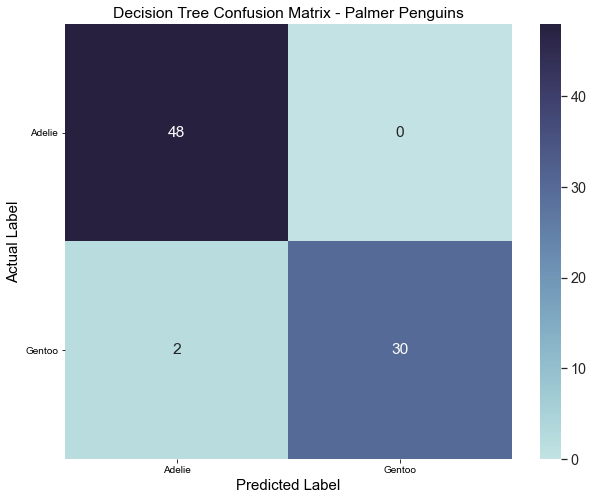

In [11]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(cm)

#plot confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Decision Tree Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Model Improvement

> Below, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is used to find the optimal values for model parameters max_depth, which controls how deep the tree goes, and min_sample_split which determines the number of samples needed to split an internal node. After cross validation, it is suggested that setting max_depth to 1 and min_samples_split to 2 will improve the model.

In [12]:
#cross validation using gridSearchCV:

tuned_param = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']

for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    dtc = GridSearchCV(
        DecisionTreeClassifier(), tuned_param,
        scoring = f'{score}_macro'
    )
    dtc.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(dtc.best_params_)
    print()
    print("Grid scores on development set:")
    means = dtc.cv_results_["mean_test_score"]
    stds = dtc.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 dtc.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 1, 'min_samples_split': 2}

Grid scores on development set:
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 2}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 4}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 6}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 8}
0.985 (+/-0.025) for {'max_depth': 1, 'min_samples_split': 10}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 2}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 4}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 6}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 8}
0.985 (+/-0.025) for {'max_depth': 2, 'min_samples_split': 10}
0.985 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 2}
0.985 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 4}
0.985 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 6}
0.985 (+/-0.025) for {'max_depth': 

### Applying Optimal Parameter Values to Model

> It was determined that setting min_sample_split to 2 and max_depth to 1 will improve the model. Below, the model is trained again by passing X_train and y_train to decision_tree.fit() with max_depth set to 1 and min_samples_split set to 2. 

In [13]:
#new model with optimal parameters
decision_tree = DecisionTreeClassifier(max_depth=1, min_samples_split = 2,random_state=42)

#train new model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

> Next, we can take a look at the decision tree produced by the tuned model now that the tuned model has been trained. Below is the decision tree produced.

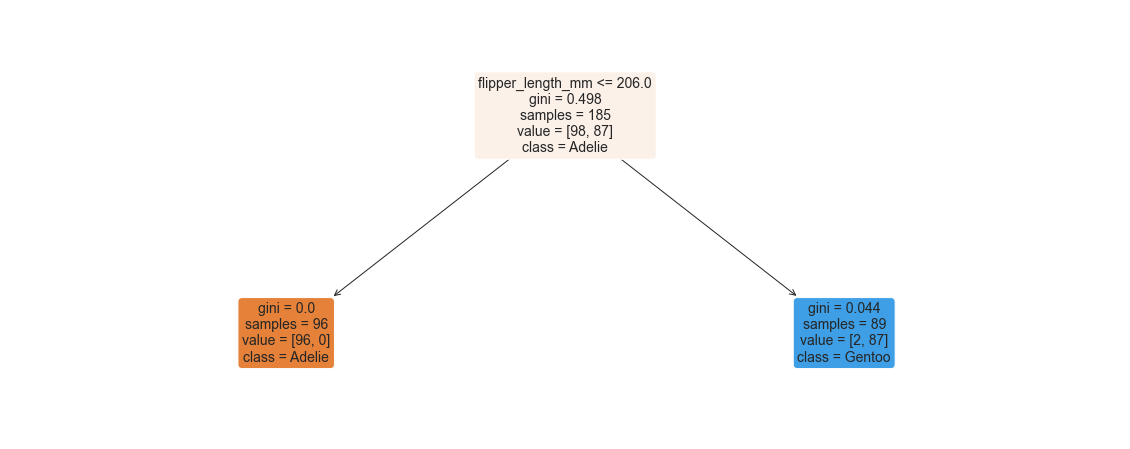

In [14]:
plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

#### Using Model on Prepared Data

> Below, predictions are made by passing X_test to decision_tree.predict().

In [15]:
#new predictions for y
y_pred = decision_tree.predict(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> The model has a decent accuracy score at 0.99. Therefore, the model is 99% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 0.98 and 1.00 respectively.

In [16]:
print(classification_report(y_test, y_pred))

#accuracy
np.sum(y_test == y_pred) / len(y_test)

# print(Counter(y_test))
# Counter(y_pred)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



0.9875

> Below, is a confusion matrix. The confusion matrix below tells us the following:

        - There are 48 observations labeled Adelie and 32 observations labeled Gentoo
        - The model predicted that there are 49 observations labeled Adelie and 31 labeled Gentoo
        - There are 48 observations correctly classifed as Adelie (True Positive)
        - There are 0 observations incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 31 observations correctly classified as Gentoo (True Negative)
        - There is 1 observation incorrectly classified as Adelie, when it should be Gentoo (False Positive)

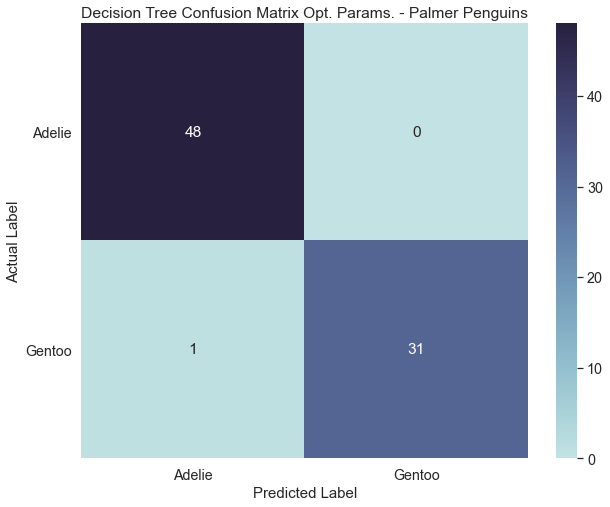

In [17]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(cm)

#plot confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Decision Tree Confusion Matrix Opt. Params. - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()


#### Conclusion

>  Based on the confusion matrix and classification report above, we can see that setting min_sample_split to 2 and max_depth to 1 produced a better classifier. Overall, the classifier with min_sample_split as 2 and max_depth as 1 had higher values for precision, accuracy, f1-score and recall than the classifier with max_depth set to 3. The improved model was about 99% accurate at classifying data from the Palmer Penguins test dataset.

***

# Logistic Regression

***



#### What is it? 
>  Logistic Regression is a machine learning algorithm used to predict the probability of a categorical dependent variable, or the probability that an instance belongs to a particular class. Logistic Regression is generally used for classification purposes. Below are variations of Logistic Regression:

        - Binary : Two possible outcomes (categories)
        - Multinomial : More than two possible outcomes without ordering
        - Ordinal : More than two possible outcomes with ordering
    


#### How does it work?
> A Logistic Regression model computes a weighted sum of input features (plus bias terms) and outputs the logistic of the result. The logistic is a sigmoid function that outputs a value between 0 and 1. The sigmoid function is used to map predictions to probabilities in machine learning.


> Below is a figure showing the difference between Linear Regression and Logistic Regression. The figure representing Linear Regression returns the weighted sum of input features while the figure representing Logistic Regression passes the weighted sum of input features through an activation function, the sigmoid function, that THEN returns a value between 0 and 1.

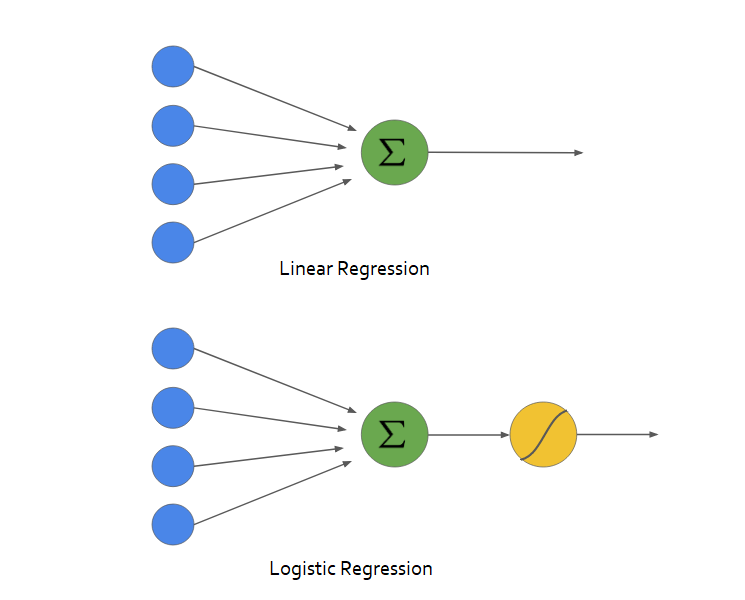

> Below is a plot of the sigmoid function. At X =0, the value is exactly 0.5. We can use 0.5 as the probability threshold to determine classes. If the probability is greater than 0.5 or X > 0, then we can classify it as Group1(Y =1). If the probability is less than 0.5 or X < 0, then we can classify it as Group2(Y=0).

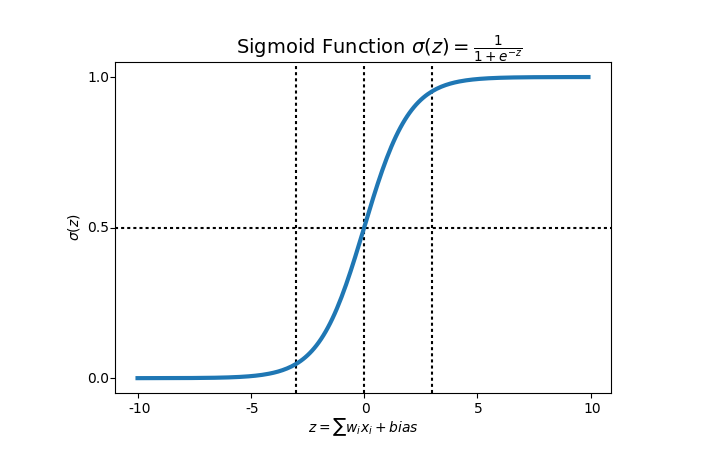

> To train and develop an accurate model with minimal error, we can use the cost function below.

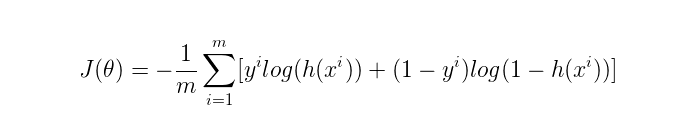


> To minimize the cost, we can use Gradient Descent. 

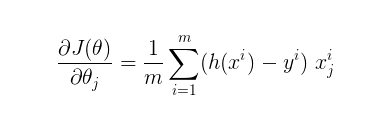

#### Model Assumptions

> Below are Logistic Regression model assumptions:

        - Dependent variable must be binary
        - Independent variables must be independent of one another. Model must have little or no multicollinearity
        - Independent variables are linearly related to the log odds
        - Only meaningful variables should be included in the model
        



#### Pros and Cons

>Pros

        - Easy to implement and train
        - It makes no assumptions about distributions of classes in feature space
        - Fast at classifying unknown records
        - Can interpret model coefficients as indicators of feature importance
>Cons

        - Over fitting may occur if the number of observations < the number of features
        - Non - Linear problems can't be solved with Logistic Regression, and linearly separable data is hardly found
          in real world scenarios
        - There are model assumptions that need to be met
     
        


### Model Implementation

> Below is an implementation of the Logistic Regression model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Scikit Learn Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Collections Counter()](https://docs.python.org/3/library/collections.html)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [1]:
#import libraries

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from collections import Counter

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

import matplotlib.patches as mpatches


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins data
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and flipper length are selected as features, while the response is species (Adelie or Gentoo).

In [4]:
#features
X = df[["body_mass_g", "flipper_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()


#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a scatter plot. Below, penguin features are plotted and colored by species type. We can see that there is a clear separation of the data points within each class/species.

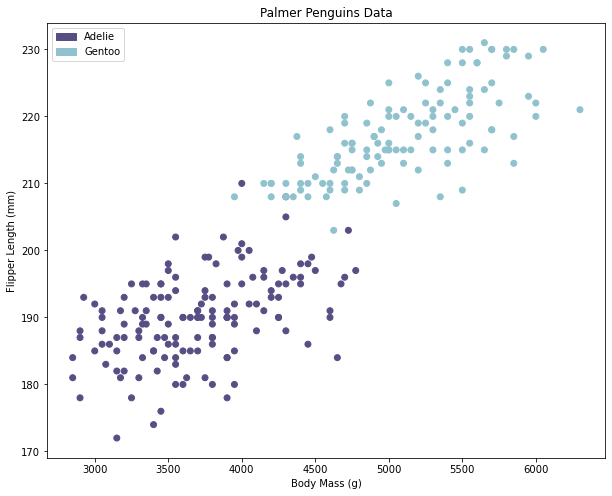

In [5]:
#plot of data
colors = ["#574E84" if label == "Adelie" else "#90C2CE" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.title("Palmer Penguins Data")
purple_patch = mpatches.Patch(color='#574E84', label='Adelie')

blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')

plt.legend(handles=[purple_patch, blue_patch])
plt.show()

> Below are box plots showing the distributions of body mass and flipper length for each species. Based on the box plots below, flipper length and body mass could possibly be good predictors for species.

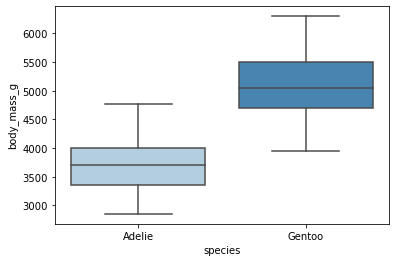

In [6]:
#boxplot of species and body mass
sns.boxplot( x=df["species"], y=df["body_mass_g"], palette="Blues")
plt.show()

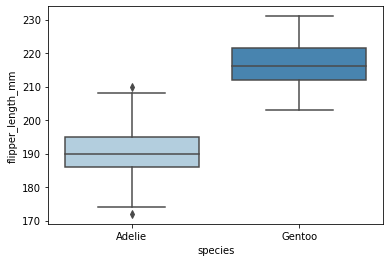

In [7]:
#boxplot of species and flipper length
sns.boxplot( x=df["species"], y=df["flipper_length_mm"], palette="Blues")
plt.show()

> Before separating the data into training and test sets, the response variables will need to be coded in ones and zeros. The following is done bellow.

        - Adelie = 0
        - Gentoo = 1

In [8]:
#code adelie as 0 and gentoo as 1
for i in range(0, len(y)):
    if(y[i] == 'Adelie'):
        y[i] = 0
    else:
        y[i] = 1

#change datatype of y from object to int:
y = y.astype('int')
y.dtype

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

> Next, I normalize the features using MinMaxScaler(). Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for more info on MinMaxScaler().

In [9]:
#normalize data to values between 0 and 1
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.26086957, 0.15254237],
       [0.27536232, 0.23728814],
       [0.11594203, 0.38983051],
       [0.17391304, 0.3559322 ],
       [0.23188406, 0.30508475],
       [0.22463768, 0.15254237],
       [0.52898551, 0.38983051],
       [0.10144928, 0.16949153],
       [0.27536232, 0.3220339 ],
       [0.44927536, 0.44067797],
       [0.24637681, 0.22033898],
       [0.17391304, 0.38983051],
       [0.47826087, 0.42372881],
       [0.13768116, 0.20338983],
       [0.39130435, 0.37288136],
       [0.15942029, 0.03389831],
       [0.2173913 , 0.13559322],
       [0.27536232, 0.28813559],
       [0.31884058, 0.22033898],
       [0.27536232, 0.13559322],
       [0.27536232, 0.25423729],
       [0.20289855, 0.18644068],
       [0.10144928, 0.25423729],
       [0.08695652, 0.        ],
       [0.31884058, 0.13559322],
       [0.11594203, 0.10169492],
       [0.30434783, 0.10169492],
       [0.13043478, 0.27118644],
       [0.30434783, 0.20338983],
       [0.13768116, 0.38983051],
       [0.

> Finally, the data is then divided into train and test sets. The Logistic Regression model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 75% of the data will be used to train the model, while 25% of the data will be used to test the model.

In [10]:
#data is split into test and training sets.

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state = 1234)


#### Model Building

> Now that data preparation is complete, we can build the model.

> Below are functions for sigmoid and cost where:

        - y is the true label
        - y_hat is the predicted label

In [11]:
#sigmoid

def sigmoid(z):
    
    return 1/(1 + np.exp(-z))

#function for cost/loss
def loss(y, y_hat):
    loss = -np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

> Below is a function for gradient descent where:

        - X is the input
        - y is the true label
        - y_hat is the predicted label
        - b is the bias (a parameter)
        - w is the weight (also a parameter)
        - m is the number of training samples

In [12]:
def gradients(X, y, y_hat):
    
    #retrieve number of training samples, m
    m = X.shape[0]
    
    # retrieve the gradient of loss with respect to the weights.
    dw = np.dot(X.T, (y_hat - y)) * (1/m)
    
    # retrieve the Gradient of loss with respect to the bias
    db = np.sum((y_hat - y)) * (1/m)
    
    return dw, db


> Below is a function to train the model and initialize weights and bias where:

        - X is the input
        - y is the true label
        - bs is batch size
        - m is the number of training samples
        - n is the number of features (2 in this case)
        - epochs are the number of iterations
        - LR is the learning rate

In [13]:
def train(X, y, bs, epochs, lr):
    
    m, n = X.shape
    
    #initializing weights and bias with zeros. w 2x1
    w = np.zeros((n,1))
    b = 0.0
    
    #reshape y
    y = y.reshape(m,1)

    
    #list to store loss/costs
    losses = []
    
    #training looop
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            

            #getting predictions, y_hat
            y_hat = sigmoid((xb@ w) + b)
            
            #retrieving gradients of loss WRT parameters, dw and db
            dw, db = gradients(xb, yb, y_hat)
            
            #parameters updated
            w = w - lr*dw
            b = b - lr*db 
        
        # Calculate loss add it to the list
        l = loss(y, sigmoid((X @w) + b))
        losses.append(l)
        
    #return bias, losses, and weights
    return w, b, losses

> Finally, below is a model to predict the labels where:

        - X is the input

In [14]:
def predictClass(X):

    #calculate predictions
    y_preds = sigmoid((X @ w) + b)
    
    #list to store predictions
    pred_label = []
    
    #probability threshold at 0.5
    pred_label = [1 if i > 0.5 else 0 for i in y_preds]
    
    #return predictions
    return np.array(pred_label)

#### Using Model on Prepared Data

> Below, the model is trained by passing X_train and y_train to train().  Afterwards, predictions are made by passing X_test to predictClass().

In [15]:
w, b, loss = train(X_train, y_train, bs = 100, epochs = 15000, lr = 0.001)

y_hat = predictClass(X_test)

#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tell us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> With batch size, learning rate, and epochs set to 100, 0.001, and 15,000 respectively, the model has a decent accuracy score at about 0.99. Therefore, the model is about 99% accurate at predicting labels for this dataset. Precision for Adelie and Gentoo are 1.00 and 0.96 respectively.

In [16]:
#classification report
print(classification_report(y_test, y_hat))

#accuracy
print(np.sum(y_test == y_hat) / len(y_test))

# print(Counter(y_test))
# Counter(y_hat)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.96      1.00      0.98        26

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

0.9850746268656716


> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 40 observations labeled Adelie and 27 labeled Gentoo
        - There are 40 observations correctly classifed as Adelie (True Positive)
        - There is 1 observation incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 26 observations correctly classified as Gentoo (True Negative)
        - There are 0 observations incorrectly classified as Adelie, when it should be Gentoo (False Positive)

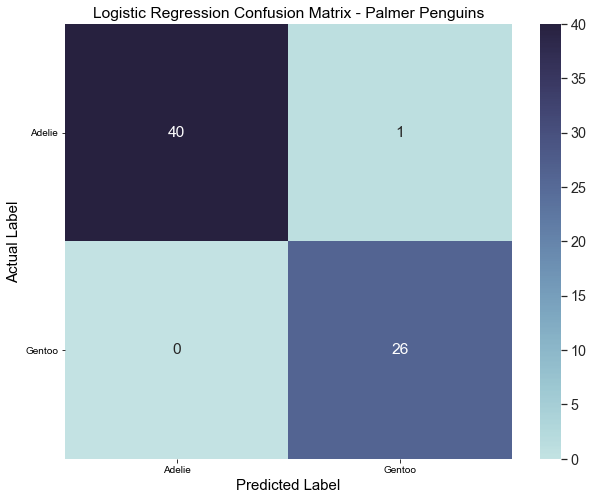

In [17]:
#confusion matrix
cm = confusion_matrix(y_test, y_hat)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Logistic Regression Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()



### Model Implementation Using Scikit

> Logistic Regression can also be implemented using Scikit Learn. Below, I show how this can be done.



#### Libraries Used

> LogisticRegression() from Scikit Learn

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [18]:
#import LogisticRegression

from sklearn.linear_model import LogisticRegression


#### Model Build
> Below, the model is built using LogisticRegression() from Scikit Learn. The model is then trained by passing X_train and y_train to logisticRegr.fit() Afterwards, predictions are made by passing X_test to logisticRegr.predict().

In [19]:
#default parameters
logisticRegr = LogisticRegression()

#fitting the model
logisticRegr.fit(X_train, y_train)

#predicts labels
pred = logisticRegr.predict(X_test)

#### Model Evaluation

> As seen below, this classifier built with Scikit Learn produces different results as the classifier that was built from scratch. This model has an accuracy of 0.97. Precision for Adelie and Gentoo are 0.98 and 0.96 respectively. The model classification report and confusion matrix are seen below. 

In [20]:
#classification report
print(classification_report(y_test, pred)) 

# print(Counter(y_test))
# Counter(pred)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.96      0.96      0.96        26

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



>  The confusion matrix below tells us the following:

        - There are 41 observations labeled Adelie and 26 observations labeled Gentoo
        - The model predicted that there are 41 observations labeled Adelie and 26 labeled Gentoo
        - There are 40 observations correctly classifed as Adelie (True Positive)
        - There is 1 observation incorrectly classified as Gentoo, when it should be Adelie (False Negative)
        - There are 25 observations correctly classified as Gentoo (True Negative)
        - There is 1 observation incorrectly classified as Adelie, when it should be Gentoo (False Positive)

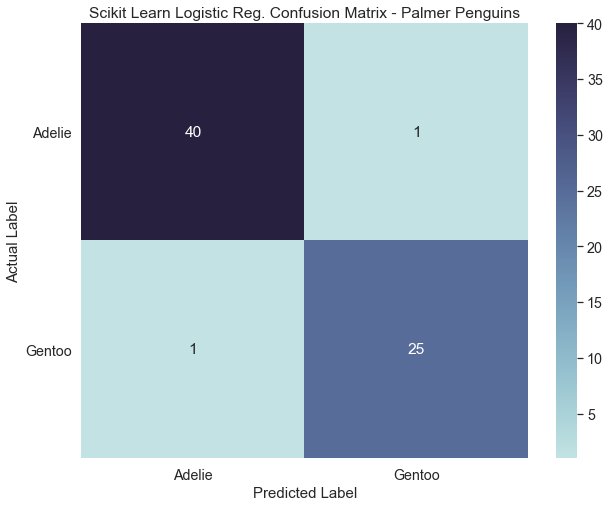

In [21]:
#confusion matrix
cm = confusion_matrix(y_test, pred)

matrix_df = pd.DataFrame(cm)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Gentoo"]
ax.set_title("Scikit Learn Logistic Reg. Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

#### Conclusion

> Overall, the Logistic Regression models were fairly decent at classifying data points from the Palmer Penguins test dataset. The model built from scratch is better than the model built using Scikit Learn since the model has higher accuracy and precision values.

***

# Single Layer Perceptron

***

#### What is it?

> Single Layer Perceptron is a machine learning algorithm used for binary classification. It is considered to be a type of Neural Network model with only one layer.

#### How does it work?

> The Perceptron model computes a weighted sum of input features (plus a bias term) and passes it through an activation function that returns a final output. A Perceptron can be broken down into five parts:

        - Input values
        - Weights and Bias
        - Weighted sum
        - Activation function
        - Output

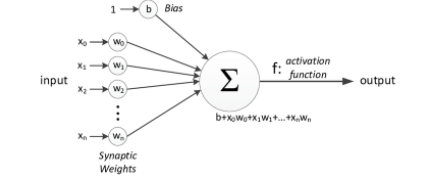


> There are a few different activation functions can be used with Perceptron. They are shown in the table below:


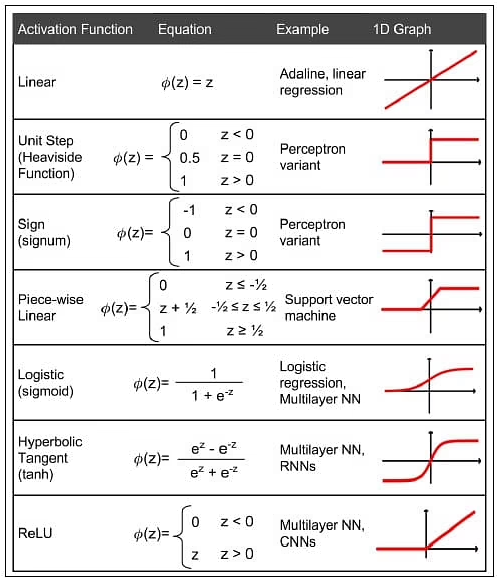


> When passing weighted sums to the sign activation function, if the output is greater than zero, then the new output is 1. Otherwise the new output is -1. This is used to classify data points. Observations with an output of 1 belong to class 1, while observations with an output of -1 should belong to class 2.


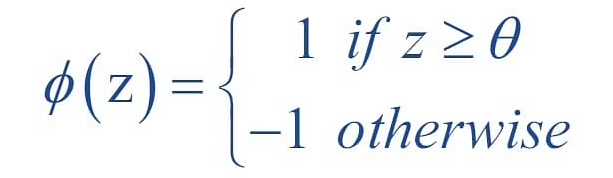


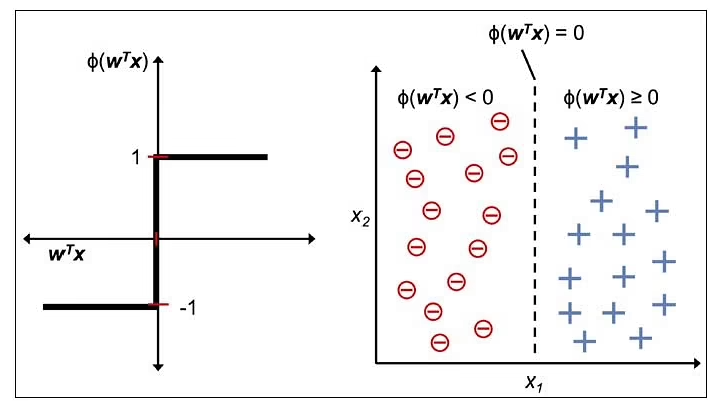

> To train a Perceptron, changes are made to the weights iteratively until the best weights are found so that the activity function produces a line with the correct orientation and slope that linearly separates the data.

> Steps:

        -1. Initialize weights to 0 or small random numbers
        -2. For each training observation:
            -Calculate the output value (class value predicted by activation function)
            -Update weights 
        
> The value for updating weights at each iteration is calculated by the learning rule where:

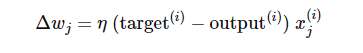

        - n, or alpha, is the learning rate
        - target is the true class label
        - output is the predicted class label
      

> In the case where the Single Layer Perceptron predicts the class correctly, the weights remain unchanged.

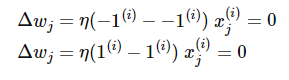

> Conversely, when the Single Layer Perceptron predicts the class incorrectly, the weights are changed and "pushed" towards the direction of the positive or negative class, respectively.


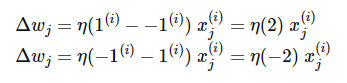


#### Model Assumptions

> Below are Single Layer Perceptron model assumptions:

        - Data should be linearly separable (data can be separated by a line)
        

### Model Implementation

> Below is an implementation of the Single Layer Perceptron model on a dataset. 

#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:

[Matplotlib](https://matplotlib.org/)


[Pandas](https://pandas.pydata.org/)


[Numpy](https://numpy.org/)


[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)

In [1]:
#import libraries

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import matplotlib.patches as mpatches

from collections import Counter

#### Data Preparation

>Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. Only two species will be used in the final dataset, so the first 276 rows will be selected from the dataframe (as seen below). For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#import palmer penguins data
from palmerpenguins import load_penguins

#load palmer penguins data
penguins = load_penguins()

#select rows with first two species only, adelie and gentoo
penguins = penguins.iloc[:276]

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 265 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
260,270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
261,272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
262,273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
263,274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and bill depth are selected as features, while the response is species (Adelie or Gentoo). 

In [4]:
#features
X = df[["bill_depth_mm","body_mass_g"]].to_numpy()

#response/labels
y = df["species"].to_numpy()


#### Visualizing the data:

> With the data now mostly prepped, we can visualize the features and response on a scatter plot. Below, penguin features are plotted and colored by species type. We can see that there is a somewhat clear separation of the data points within each class/species. So the data seems more or less linearly separable.

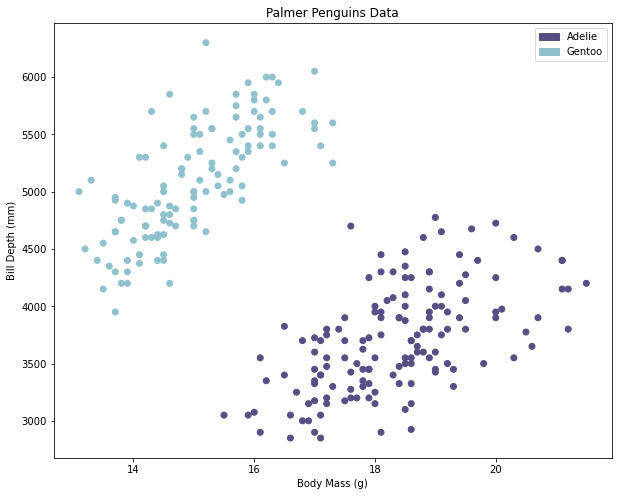

In [5]:
#plot of data
colors = ["#574E84" if label == "Adelie" else "#90C2CE" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Body Mass (g)")
plt.ylabel("Bill Depth (mm)")
plt.title("Palmer Penguins Data")

purple_patch = mpatches.Patch(color='#574E84', label='Adelie')
blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')
plt.legend(handles=[purple_patch, blue_patch])

plt.show()

> A "third feature" is then added to X containing all ones. This is for the bias term.

In [6]:
#adding addtional value of ones to array
X = df[["bill_depth_mm", "body_mass_g"]]

X["ones"] = np.ones(265)

#converting to array
X = X.to_numpy()

<ipython-input-6-fa9a5c9061ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["ones"] = np.ones(265)


> Finally, species is coded as 1 for Adelie and -1 for Gentoo. These values are chosen since we are using the sign activation function. This is seen below.

In [7]:
#if Adelie, change value to 1, else change to -1
for i in range(265):
    if y[i] == "Adelie":
        y[i] = 1
    else:
        y[i] = -1
        
#check if values were changed
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 

#### Model Building

> Now that data preparation is complete, we can build the model.

> Below, is the function for the sign activation function.

In [8]:
def sign(x, y):
    
    if x @ y > 0:
        return 1.0
    else:
        return -1.0

> Here is a function to calculate the loss.

In [9]:
def L(w, features = X, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

> Below is a function for the learning rule (a portion of it).

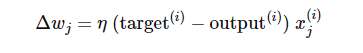

> Also, iterations (epochs) and the learning rate (alpha) are given values below.


In [10]:
#learning rule
def grad_approx(w, x, y):
    return (sign(w,x) - y)*x

def full_grad_approx(w, features=X, labels=y):
    return sum((sign(w,x) - labels[i])*x for i, x in enumerate(features))

# set epochs/iterations
epochs = 5000

# set alpha/lr
alpha = .5

#### Using Model on Prepared Data

> Below, the model is trained using the prepared data.

    -1. Initialize weights to 0 or small random numbers
    -2. For each training observation:
        -Calculate the output value (class value predicted by activation function)
        -Update weights 

> The outputted plot of Loss v. Iteration shows loss for each iteration in model training.

The Loss before implementing stochastic approx gradient descent = 238.0
The Loss after implementing stochastic approx gradient descent = 0.0


Text(0.5, 1.0, 'Loss v. Iteration')

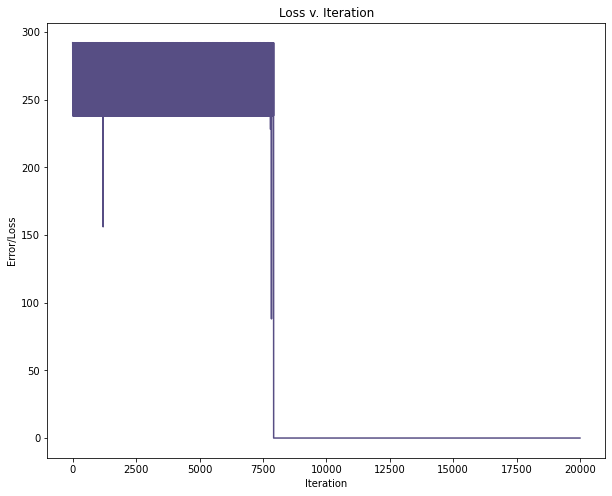

In [11]:
#intialize weights as small random numbers
w = np.random.rand(3)

print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")

#list to store loss
losses = []
for epoch in range(20000):
    
    #calculate output value and update weights
    w = w - alpha*full_grad_approx(w)
    
    #append error to losses
    losses.append(L(w))
    
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.figure(figsize=(10, 8))
plt.plot(losses, color = "#574E84")
plt.xlabel("Iteration")
plt.ylabel("Error/Loss")
plt.title("Loss v. Iteration")

#### Model Evaluation

> To find the model decision boundary, we can set z = 0 and solve for x2 (as seen below).

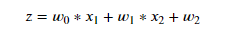

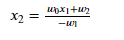

> We can then plug in the optimal values for the weights given to us by the model to get the decision boundary line.

> Below, the decision boundary is plotted along with features bill depth and body mass. We can see that the decision boundary successfully separates the data into two classes (species Adelie and Gentoo).

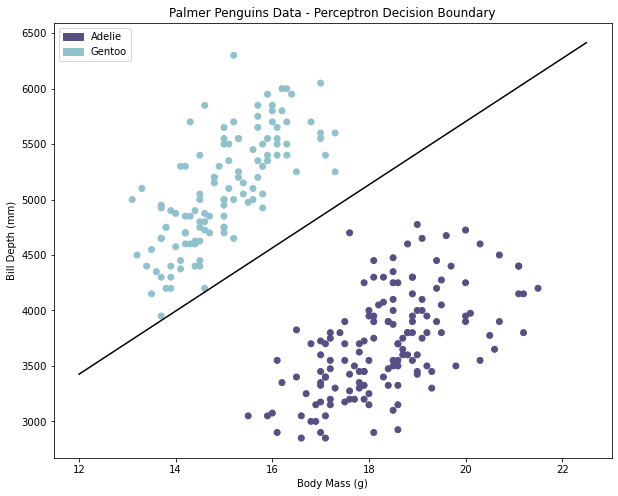

In [12]:
domain = np.arange(12, 23, .5)

#decision boundary line
line = [(w[0]*x + w[2])/-w[1] for x in domain]

colors = ["#574E84" if label == 1 else "#90C2CE" for label in y]


plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)

plt.plot(domain, 
         line, 
         label = 'seperator', 
         color='black')


plt.xlabel("Body Mass (g)")
plt.ylabel("Bill Depth (mm)")
plt.title("Palmer Penguins Data - Perceptron Decision Boundary")

purple_patch = mpatches.Patch(color='#574E84', label='Adelie')

blue_patch = mpatches.Patch(color='#90C2CE', label='Gentoo')

plt.legend(handles=[purple_patch, blue_patch])

plt.show()

> This concludes the section on Single Layer Perceptron.

***

# Multi-layer Perceptron

***

#### What is it?

> Multi-layer Perceptron is a neural network algorithm where the mapping between inputs and out put is non-linear. A multi-layer perceptron has one or more hidden layers with neurons stacked together. The neurons have activation functions that impose a threshold. Multi-layer perceptron can be split into two parts: Feedfoward and Backpropagation.

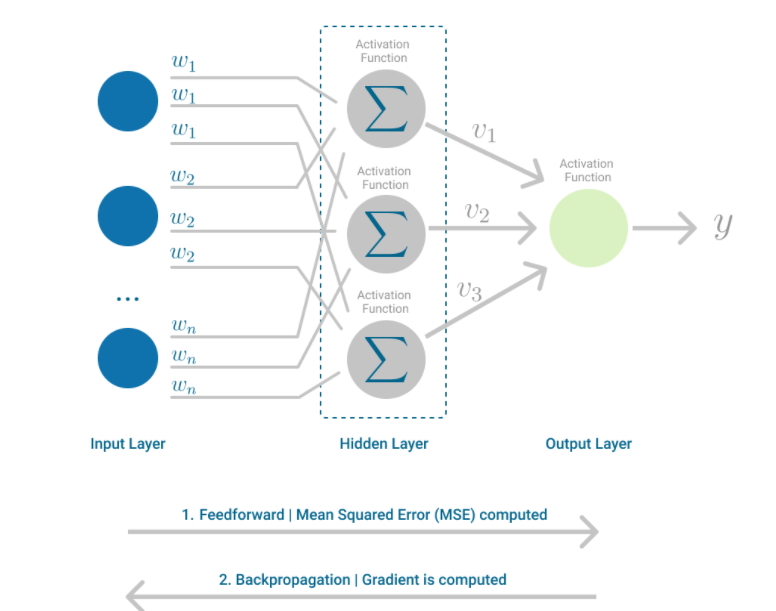

### Model Implementation

> Below is an implementation of the Multi-Layer Perceptron model on a dataset using Scikit Learn. The MLP will be used for a classification task.

#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:

[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

[Scikit Learn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[Scikit Learn Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[Seaborn](https://seaborn.pydata.org/)

In [13]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import seaborn as sns

#### Data preparation

> Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is used. This time, all species will be used for the response, while bill length, bill depth, flipper length, and body mass are the features. 

In [14]:
#drop rows with NaN
penguins = load_penguins()
penguins = penguins.dropna() 
penguins.reset_index(inplace = True)

#select features
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()

#select species as response
y = penguins["species"]


> Next, the data is then divided into train and test sets. The MLP classification model will first be trained with the data in the training sets and then tested with the data in the test sets. Below, 80% of the data will be used to train the model, while 20% of the data will be used to test the model.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                        random_state=1, test_size=0.2)

#scale data
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#### Model Building

> Now that data preparation is complete, we can build the model. This MLP model has five layers, three of them being hidden layers. The ReLU activation functions is being used.  Below, the model is trained by passing X_train and y_train to clf.fit(). Afterwards, predictions are made by passing X_test to clf.predict().

In [16]:
clf = MLPClassifier(hidden_layer_sizes=(128,64,32),
                    activation="relu",random_state=1)

#train model
clf.fit(X_train, y_train)

#make predictions
y_pred=clf.predict(X_test)


#### Model Evaluation

> Below, a classification report was generated to measure how well the classification algorithm was at predicting. 

> Accuracy: Shows us a fraction of the correct predictions. 
        
        - TP + TN / TP + TN + FP + FN
        - Number of correct predictions/ total number of predictions
        
> Precision: Precision tell us how many of the values the model predicted to be in a certain class actually belong to that class. 

        - TP/ TP +FP

> Recall: Recall is the measure of how many positive cases the classifier correctly classified over all the positive cases in the data. Recall is used to select the best model when there is a high cost associated with false negative. 

        - TP / TP + FN
        
>F1 Score: The F1 score is a function of recall and precision. F1 score is important when you want to seek balance between recall and precision

        - 2 * (Precision * Recall / Precision + Recall)

> Based on the accuracy score, the model has a decent accuracy score at about 0.985. Therefore, the model is about 99% accurate at predicting labels for this dataset. Precision for Adelie, Chinstrap, and Gentoo are 0.97, 1.00, and 1.00 respectively.

In [17]:
#classification report
print(classification_report(y_test, y_pred))

#accuracy
print(sum(y_test == y_pred) / len(y_test))

print(clf.score(X_test, y_test))

# print(Counter(y_test))
# Counter(y_pred)

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        28
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        26

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67

0.9850746268656716
0.9850746268656716


> Below, is a confusion matrix. A confusion matrix is a two-dimensional table that allows us to visualize the correctly labeled and incorrectly labeled instances by a classifier. The confusion matrix below tells us the following:

        - There are 28 observations labeled Adelie, 13 Chinstrap, and 26 Gentoo
        - The model predicted that there are 29 observations labeled Adelie, 12 Chinstrap, and 26 Gentoo
        
        - There are 28 observations correctly classified as Adelie 
        - There are 0 observations incorrectly classified as Chinstrap, when it should be Adelie 
        - There are 0 observations incorrectly classified as Gentoo, when it should be Adelie 
        
        - There are 12 observations correctly classified as Chinstrap 
        - There is 1 observation incorrectly classified as Adelie, when it should be Chinstrap
        - There are 0 observations incorrectly classified as Gentoo, when it should be Chinstrap
        
        - There are 26 observations correctly classified as Gentoo 
        - There are 0 observations incorrectly classified as Adelie, when it should be Gentoo 
        - There are 0 observations incorrectly classified as Chinstrap, when it should be Gentoo 

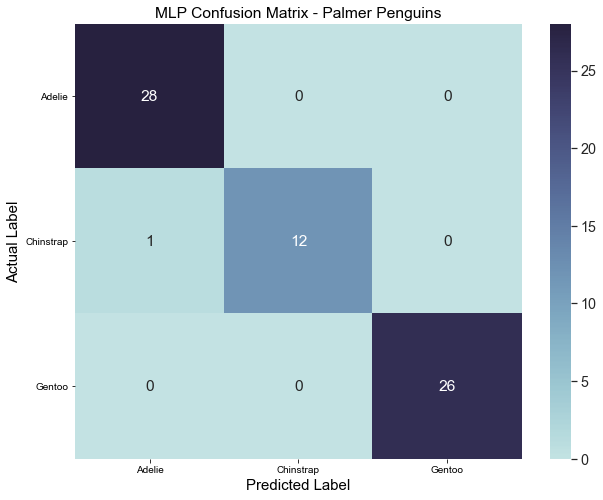

In [18]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(cm)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

labels = ["Adelie", "Chinstrap", "Gentoo"]
ax.set_title("MLP Confusion Matrix - Palmer Penguins")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("Actual Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

>  This concludes the section on Multi-Layer Perceptron.

***
# Ensemble Learning
***

#### What is it?

> Ensemble learning is a model that makes predictions based on a number of different combined models. Ensemble models combine the decisions from multiple models to improve the overall model performance. In this notebook, we will focus on tree-based ensemble leaning algorithms. 

> Ensemble methods:
    
        - Bagging: Training a bunch of individual models in a parallel fashion.
        - Boosting: Training a bunch of individual models in a sequential way
    
 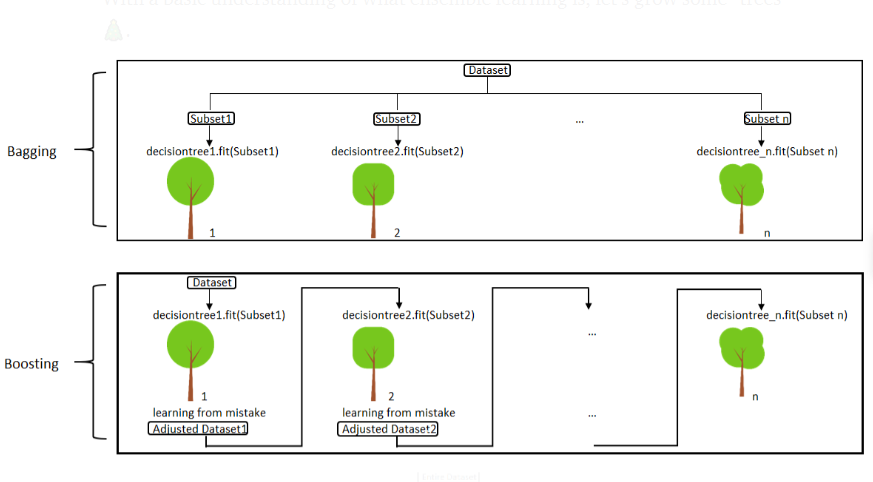

#### Random Forest

> Random forest is an ensemble model that uses bagging as the ensemble method. Steps:

        - 1. Select n random subsets from the training set
        - 2. Train n decision trees
        - 3. Each tree predicts the labels in test set
        - 4. Make a final prediction (majority vote)
        
        
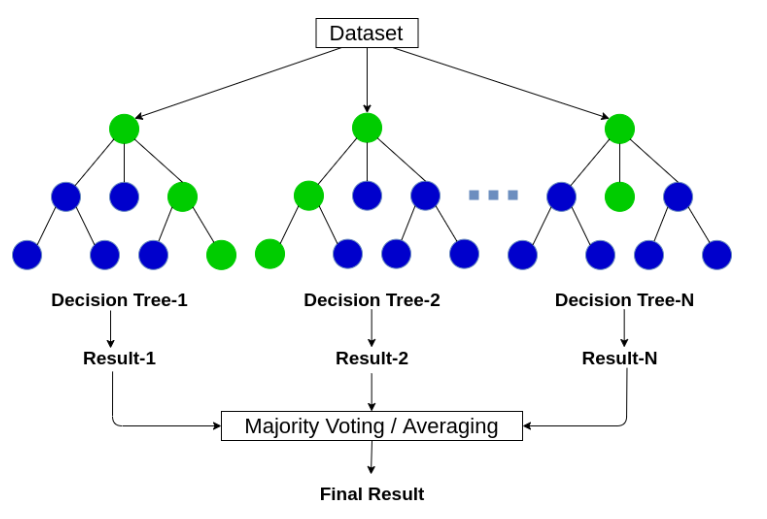

#### AdaBoost (Adaptive Boosting)

> AdaBoost is another ensemble model. AdaBoost goal is to learn from the previous mistakes of incorrectly classified data points. AdaBoost works well with decision tree. Steps:

        - 1. Initialize weights of data points
        - 2. Train a decision tree
        - 3. Calculate weighted error of the decision tree
        - 4. Calculate the decision tree's weight in the ensemble
        - 5. Update weights of wrongly classified points
        - 6. Repeat until the number of trees set to train is reached
        - 7. Make final prediction
 
 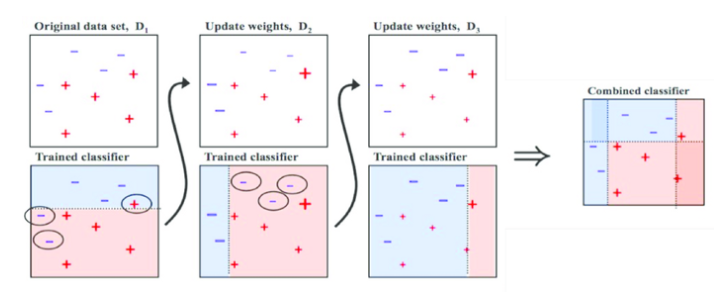 
        

#### Gradient Boosting

> Rather than updating the weights of the data points, gradient boosting learns from the residual error. Steps:

        - 1. Train a decision tree
        - 2. Use trained tree to predict
        - 3. Calculate the residual of the tree and save the residual errors as new y
        - 4. Repeat until the number of trees set to train is reached
        - 5. Make a final prediction

### Implementation using Scikit Learn

> Below is an implementation of the three ensemble methods on a dataset. 

#### Libraries Used

[AccuracyScore](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/)


In [1]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import numpy as np

import pandas as pd

from palmerpenguins import load_penguins

#### Data Preparation

> Before model building and model implementation, a dataset will be prepared for use. Below, the Palmer Penguins dataset is imported. For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "Palmer Penguins" or click [here](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
#load in data
penguins = load_penguins()

#veiw penguins dataframe
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


> Since the data contains NaN for a couple of the observations, I will drop all rows containing the value to avoid any issues with model implementation later on. After dropping the rows, 333 rows remain.

In [3]:
#drop rows with NaN
df = penguins.dropna() 
df.reset_index(inplace = True)
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
328,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


> The data is then split into an array containing features and an array containing the responses/labels. Body mass and bill length are selected as features, while the response is species (Adelie, Chinstrap, or Gentoo).

In [4]:
#features
X = df[["body_mass_g", "bill_length_mm"]].to_numpy()

#response/labels
y = df["species"].to_numpy()

> Next, the data is then divided into train and test sets. Below, 70% of the data will be used to train the model, while 30% of the data will be used to test the model.

In [5]:
#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=89)

#### Model Building

> Below, a decision tree model is fit by passing X_train and y_train to clf.fit(). Then predictions are made by passing X_test to clf.predict. Finally, the accuracy of the model is calculated below. Alone, the decision tree model has an accuracy of 0.91.

In [6]:
#decision tree model fit.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#predictions made
y_pred = clf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)

0.91

> Below, a Random Forest model is fit by passing X_train and y_train to RFclf.fit(). Then predictions are made by passing X_test to RFclf.predict. Finally, the accuracy of the model is calculated below. The accuracy of this model is 0.96. Compared to the decision tree model, we can see that the accuracy is higher.

In [7]:
#Random forest model fit
RFclf = RandomForestClassifier()
RFclf.fit(X_train, y_train)

#predictions made
y_pred = RFclf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)


0.96

> Below, an AdaBoost model is fit by passing X_train and y_train to ADAclf.fit(). Then predictions are made by passing X_test to ADAclf.predict. Finally, the accuracy of the model is calculated below. The accuracy of this model is 0.84. Compared to the decision tree model, we can see that the accuracy is lower.

In [8]:
#AdaBoost model fit
ADAclf = AdaBoostClassifier()
ADAclf.fit(X_train, y_train)

#predictions made
y_pred = ADAclf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)


0.84

> Below, a Gradient Boost model is fit by passing X_train and y_train to GBclf.fit(). Then predictions are made by passing X_test to GBclf.predict. Finally, the accuracy of the model is calculated below. The accuracy of this model is 0.91. Compared to the decision tree model, we can see that the accuracy is higher.

In [9]:
#gradient boost model fit
GBclf = GradientBoostingClassifier(n_estimators=100)
GBclf.fit(X_train, y_train)

#predictions made
y_pred = GBclf.predict(X_test)

#accuracy calculated
accuracy_score(y_test, y_pred)


0.91

#### Conclusion

> Most of the ensemble models outperformed the decision tree model. Another way to create an ensemble is to use Scikit Learn's  [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to combine multiple models into a single model that out performs the individual models. VotingClassifier() allows the user to combine a number of models (such as KNN, Naive Bayes, Logistic, etc.) into one to boost the model performance. 

***

# Gradient Descent 

***

#### What is it?

> Gradient descent is an iterative optimization function for finding the local minimum of a function.

#### How does it work in machine learning?

> Gradient descent is an optimization algorithm used to find the values of coefficients in a function (f) that minimizes a cost function. A cost function is a function that measures the performance of a machine learning model. It quantifies the error between true and predicted values. The goal is to minimize the cost function to reduce the errors and improve model performance. Gradient descent essentially trains a ML model.

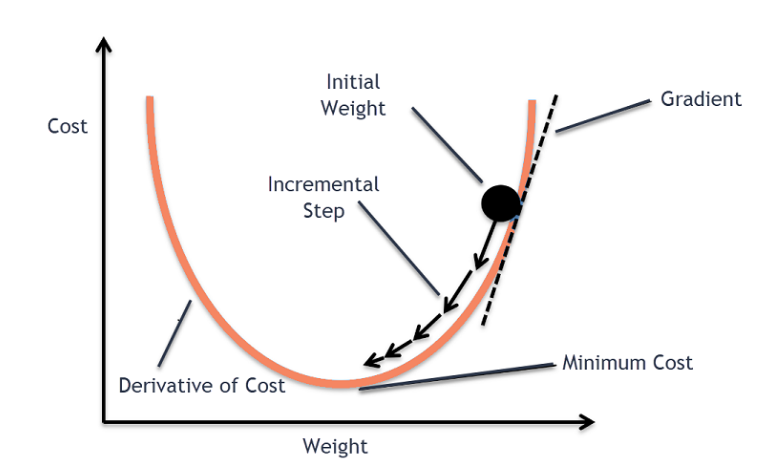

> For example, given the cost function: 

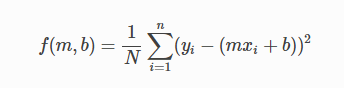

> The gradients can be calculated as:

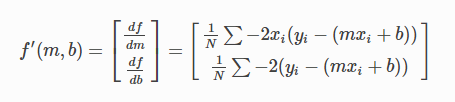

> Below are the steps for gradient descent implemented in a machine learning algorithm:

        - 1. Initialize weights with random value 
        - 2. Calculate error/cost gradient w.r.t the weights
        - 3. Adjust the weights with the gradients to reach optimal value where error is minimized
        - 4. Use new weights for prediction and calculate new error/cost
        - 5. Repeat until convergence or until further adjustments to the weights do not significantly reduce  the error

> The learning rate, alpha, determines the step size for each iteration.

        - If the learning rate is optimal, the model converges to the minimum
        - If the learning rate is too small, it will take longer to reach the minimum
        - If the learning rate is higher than the optimal value, it will overshoot but converge
        - If the learning rate is very high, it overshoots and diverges from the minimum
        
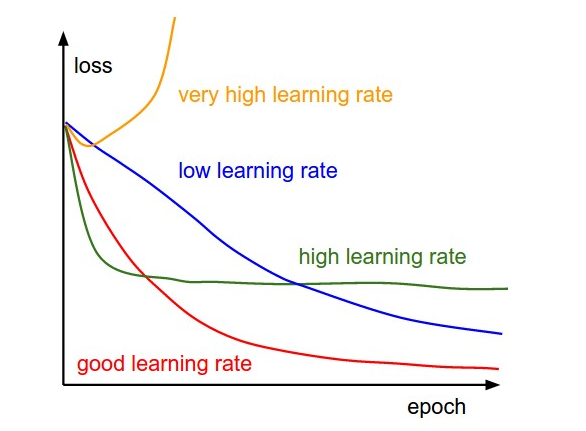

> Finally, below is the code for gradient descent:

In [1]:
def updateWeights(m, b, X, Y, learningRate):
    dw = 0
    db = 0
    n = len(X)
    
    for i in range(n):
        # Calculate partial derivatives of weights and bias
        dw += -2*X[i] * (Y[i] - (m*X[i] + b))
        db += -2*(Y[i] - (m*X[i] + b))

    #update weights
    weights -= (dw / float(n)) * learningRate
    bias -= (db / float(n)) * learningRate

    return weights, bias

***

# Linear Regression

***


#### What is it? 
>  Linear Regression is a supervised machine learning model that predicts continuous variables given data points. There are two types:

        - Simple: Only one independent variable is present
        - Multiple: More than one independent variables present
        
> This notebook will mainly focus on Simple Linear Regression.


#### How does it work?
> The Simple Linear Regression model makes predictions by computing the weighted sum of input features plus a bias term (intercept term).


> To train and develop an accurate model with minimal error, we can use the cost function below. Mean Squared Error, or MSE, measures the average squared difference between an observation's actual and predicted values. The goal is to minimize MSE to improve model accuracy. 

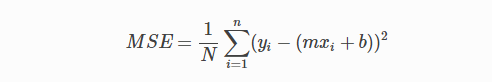


> To minimize the cost (MSE), we can use Gradient Descent. Below are the gradients of the cost:

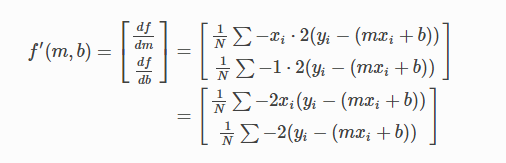



#### Model Assumptions

> Below are Linear Regression model assumptions:

        - Linearity: Dependent variable must be linearly related to independent variable(s)
        - Constant Variance: Variance of error terms should be constant
        - Normal Residuals: Error terms should be normally distributed
        - Independence: Errors are independent 

        



#### Pros and Cons

>Pros

        - Easy to implement and train
        - Susceptible to over fitting, but can be fixed with regularization and dimensionality reduction techniques
>Cons

        - There are model assumptions that need to be met
     
        


### Model Implementation

> Below is an implementation of Simple Linear Regression model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

[Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [1]:
#import libraries

from sklearn.model_selection import train_test_split

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn import metrics


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, a dataset containing data collected from a Combined Cycle Power Plant is imported. For more information on the dataset, click [here](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant). 

In [2]:
df = pd.read_csv('powerplant.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


> The data is then split into an array containing a feature and an array containing the response. Ambient temperature (AT) is selected as a feature, while the response is Electrical Output.

In [3]:
#features
X = df["AT"].to_numpy()

#response/labels
y = df["PE"].to_numpy()


#### Visualizing the data:

> With the data now mostly prepped, we can visualize the feature and response on a scatter plot. Below, is a scatter plot with ambient temperature and electrical output plotted. There looks to be a linear relationship between the two.

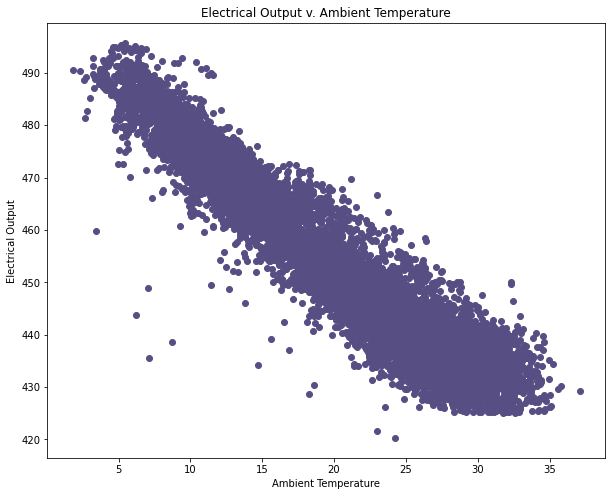

In [4]:
#plot of data

plt.figure(figsize=(10, 8))
plt.scatter(X, y, c = "#574E84")
plt.xlabel("Ambient Temperature")
plt.ylabel("Electrical Output")
plt.title("Electrical Output v. Ambient Temperature")
plt.show()

> Below, the data is divided into train and test sets. The Linear Regression model will first be trained with the data in the training sets and then tested with the data in the test set. Below, 75% of the data will be used to train the model, while 25% of the data will be used to test the model.

In [5]:
#with one feature, x shape is (#,) so I am reshaping
X = X.reshape(len(X), 1)
y = y.reshape(len(y),1)
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state = 678)


#### Model Building

> Now that data preparation is complete, we can build the model. Below are the steps:

        - 1. Calculate y_hat
        - 2. Calculate gradients of loss WRT to weights and bias
        - 3. Update weight and bias
        - 4. Repeat process until *n* iterations (epochs)

> Below a class is used to build the model. The steps mentioned above are clearly commented in the code below:
        

In [6]:
class linRegression:
    
    #learning rate and epcohs defaulted to 0.01 and 1000 respectively.
    def __init__(self, lr = 0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        #weight and bias params as None
        self.weights = None
        self.bias = None
          
        
    #Function to train the model.
    def fit(self, X, y):
        
        
        #m = num of observations, n = num of features
        m, n = X.shape    
    
    
        #initialize weights and bias as zeros
        self.weights = np.zeros((n,1))
        self.bias = 0
        
        
        # empty list to store loss/cost
        losses = []
        
        #loop for gradient descent
        for epoch in range(self.epochs):
        
            #Step1:
            #calculating prediction/y_hat
            y_hat = np.dot(X, self.weights) + self.bias
     
            #calculting loss
            loss = np.mean((y_hat - y)**2)
    
            #Appending loss to list: losses
            losses.append(loss)
    
            #Step2:
            #Calculating derivatives of weight and bias parameters
            dw = (1/m)*np.dot(X.T, (y_hat - y))
            db = (1/m)*np.sum((y_hat - y))
            
            #Step3
            #updating weight and bias
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
        
        #return parameters
        return self.weights, self.bias, losses
    
    
    #calculating y_hat with updated weights    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    

#### Using Model on Prepared Data

> Below, the model is trained by passing X_train and y_train to LR_model.fit().  Afterwards, predictions are made by passing X_test to LR_model.predict().

In [7]:
LR_model = linRegression(lr = 0.01, epochs = 15000)

#train model
w, b, l = LR_model.fit(X_train,y_train)

#make predictions
y_hat = LR_model.predict(X_test)

#### Model Evaluation

> Below, we take a look at model accuracy by comparing y and y_hat and calculating R^2.

> Looking at the dataframe containing actual and predicted values for y, the values in the two columns do not differ too much. Also, the model accuracy is 0.90.

In [8]:
# comparing true values to prediction
Compare_df = pd.DataFrame({'Actual':y_test[:,0],'Predicted':y_hat[:,0]})
Compare_df

,Actual,Predicted
0,453.08,448.194517
1,448.67,445.470229
2,441.20,434.019704
3,436.79,430.869745
4,474.87,466.306779
...,...,...
2387,476.06,475.777938
2388,445.52,448.449919
2389,426.15,429.209632
2390,430.87,438.425389


In [9]:
#accuracy
def r2(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

accuracy = r2(y_test[:,0], y_hat[:,0])

print('R squared: {:.2f}'.format(accuracy))

R squared: 0.90


> Below is a plot showing the value of cost at each iteration.

Text(0.5, 1.0, 'Loss V. Iterations')

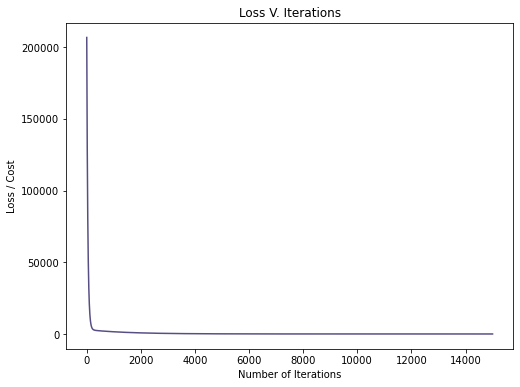

In [10]:
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(15000)], l, 'r-', c = '#574E84')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss / Cost')
plt.title("Loss V. Iterations")


### Model Implementation Using Scikit

> Linear Regression can also be implemented using Scikit Learn. Below, I show how this can be done. Below, I will use Scikit learn to build a MLR model to see if I can get a higher accuracy.



#### Libraries Used

> LinearRegression() from Scikit Learn

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [11]:
#import LogisticRegression

from sklearn.linear_model import LogisticRegression


#### Model Building: Simple Linear Regression
> First, I will build a simple linear regression model using the same features and response as above to see if the model built using Scikit Learn will have a higher accuracy. Below, the model is built using LinearRegression() from Scikit Learn. The model is then trained by passing X_train and y_train to lr.fit() Afterwards, predictions are made by passing X_test to lr.predict().

In [12]:
lr = LinearRegression()  

#train model
lr.fit(X_train, y_train)

#make predictions
y_pred= lr.predict(X_test)

#### Model Evaluation
> Below, we take a look at the Scikit model accuracy by comparing y and y_hat and calculating R^2.

> Looking at the dataframe containing actual and predicted values for y, the values in the two columns do not differ too much. The Scikit model accuracy is 89.89. The Linear Regression model built from scratch and the one built using Scikit Learn have the same accuracy at around 0.89 and 0.90. So, both are about ~90% accurate at predicting y given x.

In [13]:
#compare y and y_hat
ScikitCompare_df = pd.DataFrame({'Actual':y_test[:,0],'Predicted':y_pred[:,0]})
ScikitCompare_df

,Actual,Predicted
0,453.08,448.109648
1,448.67,445.336361
2,441.20,433.679887
3,436.79,430.473274
4,474.87,466.547676
...,...,...
2387,476.06,476.189182
2388,445.52,448.369644
2389,426.15,428.783302
2390,430.87,438.164813


In [14]:
#accuracy
print('R squared: {:.2f}'.format(lr.score(X,y)*100))

R squared: 89.89


#### Model Building:  MLR
> Next, I will use Scikit Learn to the build a MLR model using the same response and additional feature to see if the MLR model built using Scikit Learn will have higher accuracy compared to both simple Linear Regression models.

>Below, data is prepped. I add relative humidity (RH) as a feature.

In [15]:
# #features
X = df[["RH", "AT"]].to_numpy()

#response/labels
y = df["PE"].to_numpy()

#scale x
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

#split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state = 678)


> Below, the model is built using LinearRegression() from Scikit Learn. The model is then trained by passing X_train and y_train to mlr.fit(). Afterwards, predictions are made by passing X_test to mlr.predict().

In [16]:
mlr = LinearRegression()  

#train model
mlr.fit(X_train, y_train)

#make predictions
y_MLRpred= mlr.predict(X_test)

#### Model Evaluation

> Below, we take a look at the Scikit MLR model accuracy by comparing y and y_hat and calculating R^2. 

> The calculated accuracy for the MLR model is slightly better than both of the Simple Linear Regression models at 0.92.

In [17]:
#compare y and y_hat
ScikitCompareMLR_df = pd.DataFrame({'Actual':y_test,'Predicted':y_MLRpred})
ScikitCompareMLR_df


,Actual,Predicted
0,453.08,449.604526
1,448.67,443.108030
2,441.20,434.101317
3,436.79,434.478028
4,474.87,471.658405
...,...,...
2387,476.06,473.421185
2388,445.52,445.010025
2389,426.15,429.709345
2390,430.87,433.065968


In [18]:
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))

R squared: 92.09


#### Conslusion

> The Simple Linear Regression model built from scratch performed about the same as the Simple Linear Regression model built using Scikit Learn, both with a R2 of about 0.90. The MLR model built using Scikit learn out performed both Simple Linear Regression models since it has a slightly higher R2 of 0.92. This suggests that electrical output is not dependent on ambient temperature alone.

***

# K - Means

***


#### What is it? 
> K - Means clustering is an unsupervised machine learning algorithm that aggregates data points together into clusters based off of certain feature similarities. Some applications of clustering include the following:

            - Image Segmentation
            - Document Clustering
            - Customer Segmentation
            



#### How does it work?
> The goal of the algorithm is to group, or cluster, data points based off of feature similarities. Properties of clusters are as follows:

        - Data points in the same cluster should be most similar to each other
        - Data points from different clusters should be dissimilar to each other
        


> The algorithm achieves clustering by minimizing the distance between data points and their respective cluster's centroid. Distance is calculated using the euclidean distance. The formula is shown below:

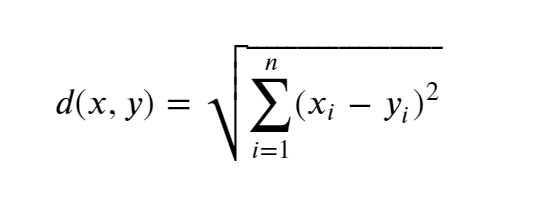

> K- means clustering algorithm can be simplified into five steps:
    
        1. Choose k, the number of clusters
        2. Select k random points from the data as centroids
        3. Assign all points to the closest centroid
        4. Recompute centroids of the newly formed clusters
        5. Repeat steps 3 and 4 until convergence

### Model Implementation

> Below is an implementation of the K - means clustering model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    
[Matplotlib](https://matplotlib.org/)

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [1]:
#import libraries

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.datasets import make_blobs


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the make blobs dataset is imported. The dataset is loaded in with two features and 700 samples. X contains the two features, while y contains the integer labels for cluster membership. We will only feed X into the model. For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "make_blobs" or click [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [2]:
#load make_blobs

X, y = make_blobs(centers=3, n_samples=700, n_features=2, shuffle=True, random_state=40)


> With the data now prepared, we are now ready to visualize the data. Based on the plot below, as expected, we can see that there is clear separation between concentrated areas of data points. 

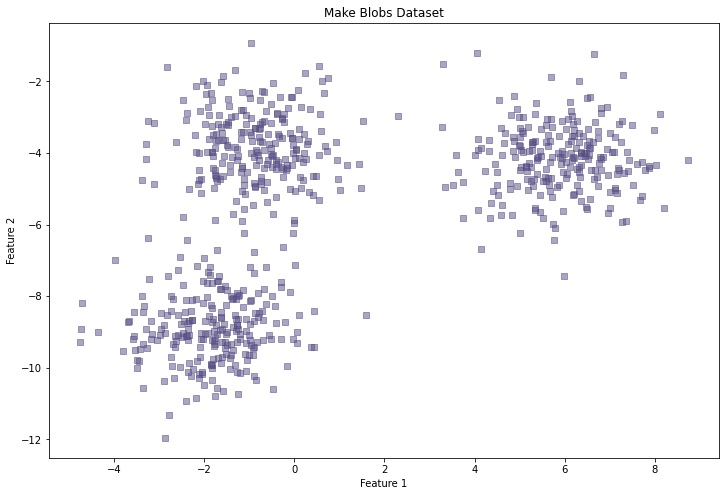

In [3]:
#scatter plot of make blobs data
fig, plot = plt.subplots(figsize=(12, 8))

plt.scatter(X[:,0], X[:,1], 
            marker = "s", 
            alpha = .5, 
            color = "#574E84")

plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')
plt.title("Make Blobs Dataset")

plt.show()

#### Model Building Steps

> With data preparation now complete, model building can now begin. Here are the steps:
    
        1. Choose k, the number of clusters
        2. Select k random points from the data as centroids
        3. Assign all points to the closest centroid
        4. Recompute centroids of the newly formed clusters
        5. Repeat steps 3 and 4 until convergence
    
   

#### Model Building

> Below the model is built using a class. The steps outlined above are clearly commented in the code below. 


In [4]:
#function for euclidean distance
def euclideanDistance(p, q):
    return np.sqrt(np.sum((p-q)**2))

In [5]:
class KMeanClustering:
    
    #Step 1, choose k. k defaulted to 3
    #plotSteps is set equal to false by default
    
    def __init__(self, K=3, maxIters = 100, plotSteps=False):
        self.K = K
        self.max_iters = maxIters
        self.plot_steps = plotSteps

        #list of sample indices for each cluster
        self.clusters = [[] for i in range(self.K)]
        
        # the centers for each cluster
        self.centroids = []
        
        
        
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #Step 2: Select k random points from the data as centroids
        
        # initialize centroids: 
        #This will randomly choose k indices
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        
        #get randomly chosen centroids using the indices found previously
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        
        # Optimization here:
        for i in range(self.max_iters):
            
            #Step 3: Assign all the points to the closest cluster centroid
            
            #clusters created/updated
            self.clusters = self._create_clusters(self.centroids)

            #plot after clusters are updated
            if self.plot_steps == True:
                self.plot()

                
            #Step 4: Recompute centroids of newly formed clusters
            
            #Update centroids: Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            
            #Step 5, repeat steps 3 and 4 until convergence
            
            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break #break if converged
  
            #plot after centroids are updated
            if self.plot_steps == True:
                self.plot()

        #return cluster labels
        return self._get_cluster_labels(self.clusters), self.plot()
           
    
    
    def _closest_centroid(self, sample, centroids):
        
        ##distance of current sample to each centroid are calcualted 
        #euclidean distance is used to get distance
        distances = [euclideanDistance(sample, point) for point in centroids]
        
        #get index of minimum distance
        closest_index = np.argmin(distances)
        
        return closest_index   
    
    
    
    # Assign the samples to the closest centroids to create clusters
    def _create_clusters(self, centroids):
        
        clusters = [[] for i in range(self.K)]
        
        #iterate over data
        for idx, sample in enumerate(self.X): 
            
            #get index of the min. distance of current sample to each centroid
            centroid_idx = self._closest_centroid(sample, centroids)
            
            clusters[centroid_idx].append(idx)
        
        return clusters

    

    def _get_centroids(self, clusters):
        
        #intialize centroids with zeros
        centroids = np.zeros((self.K, self.n_features))
        
        #iterate over clusters and calculate cluster mean
        for cluster_idx, cluster in enumerate(clusters):
            
            cluster_mean = np.mean(self.X[cluster], axis=0)
            
            #assign mean to current centroid. these serve as new centroids
            centroids[cluster_idx] = cluster_mean
             
        return centroids
    

    
    def _is_converged(self, centroids_old, centroids):
        
        # caculate distances between each old and new centroids,
        #and checks if the distance is zero
        distances = [euclideanDistance(centroids_old[i], centroids[i]) 
                     for i in range(self.K)]
        
        return sum(distances) == 0 #if zero, then it is converged
    
    
    
    def _get_cluster_labels(self, clusters):
        
        #create empty array to hold labels
        labels = np.empty(self.n_samples)
        
        # each sample will get the "label" of the cluster they are assigned to
        #the "labels" are the index of the cluster they are assigned to
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
                
        return labels
    
    

    #plots the clusters and centroids at each iteration if True
    def plot(self):
        fig, plot = plt.subplots(figsize=(12, 8))
        

        #plot all points for each cluster in a different color
        for i, index in enumerate(self.clusters):
            #colors for clusters
            colors = ["#574E84", "#90C2CE", "#3309E8"]
            
            point = self.X[index].T
            plot.scatter(*point, alpha = .5, marker = "s", c = colors[i])

        #plots the centroid as little "o"s
        for point in self.centroids:
            plot.scatter(*point, marker="o", color="black", linewidth=6)
        
        plt.xlabel('Feature 1')
        
        plt.ylabel('Feature 2')
        
        plt.title("Make Blobs Dataset Clustered")

        plt.show()
        

#### Visualizing Clusters Using Data on Model

> Below is a plot showing the final k, or 3, clusters after convergence. The black points on the plots represents the centroids for each cluster. 

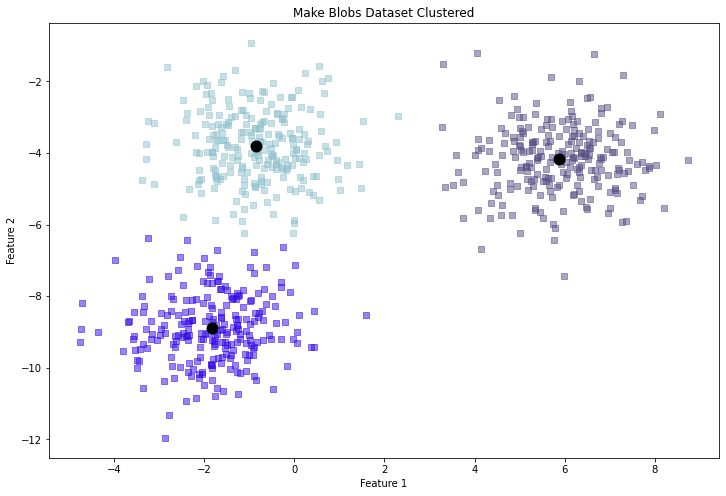

In [6]:
clusters = len(np.unique(y)) #k set to unique values in y

#setting plotSteps = True should show the plot after each iteration
kMeans = KMeanClustering(K=clusters, maxIters=150, plotSteps=False)

pred = kMeans.predict(X) #this returns sample "labels" of the cluster they are assigned to

> The K -means model was able to successfully cluster the data into three reasonable clusters. Although K-means worked really well on this dataset with k=3, a way to determine an optimal value for k is the elbow method. The elbow method is a plot of WCSS (the sum of squared distance between each point and the centroid) against the number of clusters. The "elbow point" on the plot gives you the optimal number of clusters (k). This is shown below:

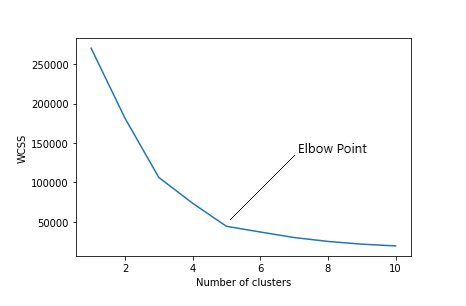
